## Método $\Delta^2$ de Aitken

El método $\Delta^2$ de Aitken está basado que la sucesión $ \{\hat{p}_n\}^\infty _{n=0}$ definida por
$$ \hat{p}_n = p_n - \frac{( p_{n+1} - p_n )^2}{p_{n+2} - 2 p_{n+1} + p_n} $$
converge más rapido a $p$ que la sucesión original $\{p_n\}^\infty _{n=0} $

### Dependencias

In [27]:
from sympy import *
from IPython.display import display, display_html, HTML, Latex
import matplotlib.pyplot as plot
import numpy as np
init_printing(use_latex=True)

x = symbols('x')

# Método para imprimir la información en forma de tabla
def printTable(columns, data):
    base_table = ( '<table class="table-bordered table-responsive"><thead><tr>{}'
             '</tr></thead><tbody><tr>{}</tr>'
             '</tbody></table>'
    ).format(
        '<th style="width:40px; text-align:center">{}</th>'.format(
            '</th><th style="text-align:center">'.join(j for j in columns)),
        '</tr><tr>'.join(
            '<td style="text-align:center;">{}</td>'.format('</td><td>'.join(j for j in row)) for row in data
        )
    )
    display(HTML(base_table))

### Programa

In [71]:
# Solicitando la función a evaluar
while True:
    try:
        g = sympify(input('Ingrese la función g(x): '))
        break
    except (SympifyError, TypeError):
        print("¡Ups! Parece que la función no fue ingresada correctamente. Intente de nuevo.")
display(Latex('$$ g(x) = ' + latex(g) + ' $$'))

Ingrese la función g(x): 0.5(cos(x)+sin(x))
¡Ups! Parece que la función no fue ingresada correctamente. Intente de nuevo.
Ingrese la función g(x): 0.5*(cos(x)+sin(x))


<IPython.core.display.Latex object>

In [72]:
# Solicitando valor inicial
while True:
    try:
        x_inicial = float(sympify(input("Ingrese el valor inicial x0: ")).evalf())
        break
    except (ValueError, TypeError) as e:
        print("El valor ingresado no es un número. Error: {}\nIntente de nuevo.".format(e))
print("x0 = {}".format(x_inicial))

Ingrese el valor inicial x0: 0
x0 = 0.0


In [23]:
# Solicitando la tolerancia
while True:
    try:
        tol = abs(float(input("Ingrese la tolerancia deseada (p. e. 1e-6): ")))
        break
    except ValueError:
        print("El valor ingresado no es un número. Intente de nuevo.")
print("tolerancia = {}".format(tol))

Ingrese la tolerancia deseada (p. e. 1e-6): 1e-9
tolerancia = 1e-09


n,xn,xn+1,xn+2,pn,En
0,0.0000000000,0.0000000000,0.5000000000,0.7776147730,N/A
1,0.5000000000,0.5000000000,0.6785040502,0.7069913925,7.0623380518e-2
2,0.6785040502,0.6785040502,0.7030708011,0.7048292862,2.1621063359e-3
3,0.7030708011,0.7030708011,0.7047118221,0.7048120672,1.7218960536e-5
4,0.7047118221,0.7047118221,0.7048062961,0.7048120022,6.5009594818e-8
5,0.7048062961,0.7048062961,0.7048116772,0.7048120020,2.1291524099e-10


Raíz encontrada: 0.704812002001991
 En la iteración 6


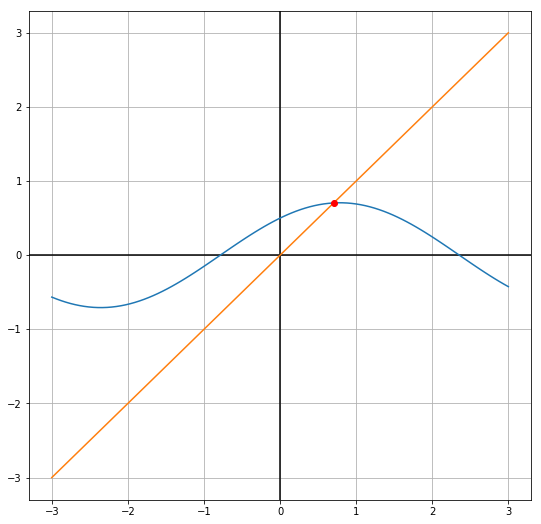

In [73]:
x0 = x_inicial
columns = ["n", "x<sub>n</sub>", "x<sub>n+1</sub>", "x<sub>n+2</sub>", "p<sub>n</sub>", "E<sub>abs</sub>"]
data =[]
p0 = None
e_abs = oo.evalf()
n = 0
while True:
    if (e_abs < tol): break
    x1 = g.subs(x, x0).evalf()
    x2 = g.subs(x, x1).evalf()
    p = x0 - ((x1 - x0)**2)/(x2 - 2*x1 + x0)
    if n > 0: e_abs = abs(p - p0)
    aux = [str(n), "{:.10f}".format(x0), "{:.10f}".format(x0), "{:.10f}".format(x1),
           "{:.10f}".format(p), "{:.10e}".format(e_abs) if n > 0 else "N/A"]
    data.append(aux)
    n += 1
    p0 = p
    x0 = x1

printTable(columns, data)
print("Raíz encontrada: {}\n En la iteración {}".format(p, n))

plot.close()
fig, ax = plot.subplots(figsize=(9,9));
ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")
xv = np.linspace(int(p)-3, int(p)+3, 100)
plot.plot(xv, lambdify(x, g)(xv))
plot.plot(xv, xv)
plot.plot([p],[p],"ro")
plot.grid()
plot.show()

 ## Método de Steffensen

Este se base en el método $\Delta^2$ de Aitken. Sin embargo, la diferencia es que en el método de Steffensen, se **introduce la aproximación** en la $g(x)$, debido a que $\hat{p}$ se considera una buena aproximación, introducirlo como valor inicial en la siguiente ronda de iteraciones genera cada vez una mejor aproximación.

### Programa

In [67]:
# Solicitando la función a evaluar
while True:
    try:
        g = sympify(input('Ingrese la función g(x): '))
        break
    except SympifyError:
        print("¡Ups! Parece que la función no fue ingresada correctamente. Intente de nuevo.")
display(Latex('$$ g(x) = ' + latex(g) + ' $$'))

Ingrese la función g(x): sqrt(10/(x+4))


<IPython.core.display.Latex object>

In [68]:
# Solicitando valor inicial
while True:
    try:
        x_inicial = float(sympify(input("Ingrese el valor inicial x0: ")).evalf())
        break
    except (ValueError, TypeError) as e:
        print("El valor ingresado no es un número. Error: {}\nIntente de nuevo.".format(e))
print("x0 = {}".format(x_inicial))

Ingrese el valor inicial x0: 1.5
x0 = 1.5


In [57]:
# Solicitando la tolerancia
while True:
    try:
        tol = abs(float(input("Ingrese la tolerancia deseada (p. e. 1e-6): ")))
        break
    except ValueError:
        print("El valor ingresado no es un número. Intente de nuevo.")
print("tolerancia = {}".format(tol))

Ingrese la tolerancia deseada (p. e. 1e-6): 1e-9
tolerancia = 1e-09


n,xn,xn+1,xn+2,pn,Eabs
0,1.5000000000,1.5000000000,1.3483997249,1.3652652240,N/A
1,1.3652652240,1.3652652240,1.3652255336,1.3652300134,3.5210540675e-5
2,1.3652300134,1.3652300134,1.3652300134,1.3652300134,2.4886759320e-12


Raíz encontrada: 1.36523001341410
En la iteración 3


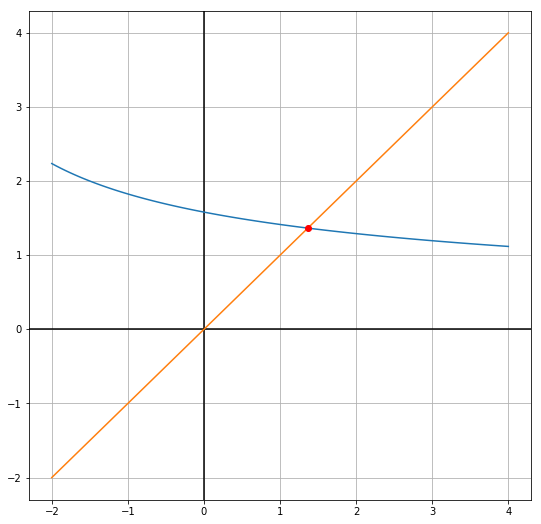

In [69]:
x0 = x_inicial
columns = ["n", "x<sub>n</sub>", "x<sub>n+1</sub>", "x<sub>n+2</sub>", "p<sub>n</sub>", "E<sub>abs</sub>"]
data =[]
p0 = None
e_abs = oo.evalf()
n = 0
while True:
    if (e_abs < tol): break
    x1 = g.subs(x, x0).evalf()
    x2 = g.subs(x, x1).evalf()
    p = x0 - ((x1 - x0)**2)/(x2 - 2*x1 + x0)
    if n > 0: e_abs = abs(p - p0)
    aux = [str(n), "{:.10f}".format(x0), "{:.10f}".format(x0), "{:.10f}".format(x1),
           "{:.10f}".format(p), "{:.10e}".format(e_abs) if n > 0 else "N/A"]
    data.append(aux)
    n += 1
    p0 = p
    x0 = p

printTable(columns, data)
print("Raíz encontrada: {}\nEn la iteración {}".format(p, n))

plot.close()
fig, ax = plot.subplots(figsize=(9,9));
ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")
xv = np.linspace(int(p)-3, int(p)+3, 100)
plot.plot(xv, lambdify(x, g)(xv))
plot.plot(xv, xv)
plot.plot([p],[p],"ro")
plot.grid()
plot.show()